In [1]:
!nvidia-smi

Mon May 13 15:51:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q split-folders[full]

# Import Neccessary Libraries

In [3]:
import copy
from collections import namedtuple
import os
import random
import shutil
import time
import collections
import math
import pandas as pd
import numpy  as np

# visualization libraries
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.optim.lr_scheduler import _LRScheduler
import torch.utils.data as data

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

from sklearn import decomposition
from sklearn import manifold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from itertools import cycle
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize

from sklearn import svm
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

# for splitting the images into train/ test/val folder
import splitfolders
from PIL import Image

In [4]:
# Define seed to eneable reproducibility of results
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [5]:

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [6]:

# # Unpack the archive file
# shutil.unpack_archive("/content/drive/MyDrive/Colab_Notebooks/train.zip", "/content/drive/MyDrive/Colab_Notebooks/5Xray/")



### Splitting images into train, val and test folders

In [7]:
# splitfolders.ratio(r"/content/drive/MyDrive/Colab_Notebooks/5Xray/trains",output="/content/drive/MyDrive/Colab_Notebooks/5Xray",
#     seed=1337, ratio=(0.6,0.2,0.2), group_prefix=None, move=False)

In [8]:
# def convert_images(directory):
#     for root, dirs, files in os.walk(directory):
#         for file in files:
#             if file.endswith(".jpeg") or file.endswith(".png"):
#                 file_path = os.path.join(root, file)
#                 img = Image.open(file_path)
#                 # Convert image to 'RGB' if it's 'RGBA' or grayscale to avoid issues saving as JPEG
#                 if img.mode != 'RGB':
#                     img = img.convert('RGB')
#                 # Define the new filename, replacing the old extension with '.jpg'
#                 new_filename = os.path.splitext(file)[0] + '.jpg'
#                 new_file_path = os.path.join(root, new_filename)
#                 img.save(new_file_path, 'JPEG')  # Save the file with JPG encoding
#                 os.remove(file_path)  # Optionally remove the old file

# # Directories to process
# directories = ['/content/drive/MyDrive/Colab_Notebooks/Xray/test',
#                '/content/drive/MyDrive/Colab_Notebooks/Xray/train',
#                '/content/drive/MyDrive/Colab_Notebooks/Xray/val']

# for directory in directories:
#     convert_images(directory)


## Create a `train_val` folder by copying files in train and val into the new folder `train_val`

In [9]:
# # create a new folder `train_val` in myData folder
# os.makedirs(r"/content/drive/MyDrive/Colab_Notebooks/5Xray/train_val",exist_ok=True)

In [10]:
# # make new folders in the train_val folder
# for folder in folders:
#      os.makedirs(r"/content/drive/MyDrive/Colab_Notebooks/5Xray/train_val/"  + folder,exist_ok=True)
# os.getcwd()

In [11]:
# folders = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

In [12]:
# def copy_files(src_directory, dest_directory):
#     for folder in folders:
#         source_folder = os.path.join(src_directory, folder)
#         destination_folder = os.path.join(dest_directory, folder)
#         try:
#             os.makedirs(destination_folder, exist_ok=True)
#             files = os.listdir(source_folder)
#             for filename in files:
#                 if filename.endswith(".jpg") or filename.endswith(".jpeg"):
#                     src_file_path = os.path.join(source_folder, filename)
#                     dest_file_path = os.path.join(destination_folder, filename)
#                     shutil.copyfile(src_file_path, dest_file_path)
#         except Exception as e:
#             print(f"Failed to process folder {folder}. Error: {e}")

# # Example usage
# train_directory = "/content/drive/MyDrive/Colab_Notebooks/5Xray/train"
# copy_files(train_directory, "/content/drive/MyDrive/Colab_Notebooks/5Xray/train_val")

# val_directory = "/content/drive/MyDrive/Colab_Notebooks/5Xray/val"
# copy_files(val_directory, "/content/drive/MyDrive/Colab_Notebooks/5Xray/train_val")


In [13]:
# # Rename all images in the test folder with the prefix of the each classes
# # Combine these classes into one folder
# directory = r"C:/content/drive/MyDrive/Colab_Notebooks/Xray/test"
# for folder in os.listdir(directory):
#     directory = r"/content/drive/MyDrive/Colab_Notebooks/Xray/test" +"/" + folder # each class folder in the test folder
#     extension = ".jpg"  # extension type we are looking for
#     count = 0 # initial count of images in the test folder
#     for filename in os.listdir(directory):
#         if filename.endswith(extension):
#             new_filename = f"{folder}_{count}{extension}"
#             os.rename(os.path.join(directory, filename), os.path.join(directory, new_filename))
#             count += 1

In [14]:
# # move all images from each class folder into a combine folder
# os.makedirs(r"/content/drive/MyDrive/Colab_Notebooks/Xray/test/Unknown",exist_ok=True) # make a new directory
# for folder in folders:
#   # Loop through all folders
#   src_folder = r"/content/drive/MyDrive/Colab_Notebooks/Xray/test" + "/" + folder
#   dest_folder = r"/content/drive/MyDrive/Colab_Notebooks/Xray/test/Unknown"
#   # Get all files in the source folder
#   files = os.listdir(src_folder)
#   # Loop through all the files and move them to the destination folder
#   for file in files:
#       # Get the full path of the file
#       file_path = os.path.join(src_folder, file)
#       # Move the file to the destination folder
#       shutil.copy(file_path, dest_folder)


In [15]:
# import os

# # Define your directories
# directories = ['/content/drive/MyDrive/Colab_Notebooks/5Xray/train/PNEUMONIA'] #'/content/drive/MyDrive/Colab_Notebooks/Xray/train_val','/content/drive/MyDrive/Colab_Notebooks/Xray/val', '/content/drive/MyDrive/Colab_Notebooks/Xray/Unknown']

# ## Mapping of old prefixes to new
# class_mapping = {
#     'COVID19': 'COV',
#     'NORMAL2-IM': 'NOR',
#     'IM': 'NOR',  # Handle "Normal" images
#     'person': 'PNE',  # Pneumonia images are prefixed with 'person'
#     'Tuberculosis': 'TUB'
# }

# def extract_unique_id(filename, old_prefix):
#     if old_prefix == 'person':
#         # Extract the numeric identifier for pneumonia images
#         # Assumption: the numeric identifier is the last number in the filename
#         parts = filename.rstrip('.jpg').split('_')
#         numeric_part = next((part for part in reversed(parts) if part.isdigit()), None)
#         return numeric_part
#     elif old_prefix in ['NORMAL2-IM', 'IM']:
#         # Extract the identifier after 'IM-' or the last part of the filename
#         return filename.split('IM-')[-1].split('.')[0]
#     elif old_prefix == 'Tuberculosis':
#         # Extract the number after 'Tuberculosis-'
#         return filename.split('Tuberculosis-')[-1].split('.')[0]
#     else:
#         # General case for other types
#         return filename.split('(')[-1].split(')')[0] if '(' in filename else filename.split('_')[-1].split('.')[0]

# for directory in directories:
#     for filename in os.listdir(directory):
#         # Ensure that we are dealing with files, not directories
#         full_path = os.path.join(directory, filename)
#         if os.path.isfile(full_path):
#             # Determine the class based on the prefix of the filename
#             for old_prefix, new_prefix in class_mapping.items():
#                 if filename.startswith(old_prefix):
#                     unique_id = extract_unique_id(filename, old_prefix)
#                     if unique_id is None:
#                         continue  # Skip renaming if no valid identifier is found
#                     new_name = f"{new_prefix}_{unique_id}.jpg"
#                     new_path = os.path.join(directory, new_name)
#                     os.rename(full_path, new_path)  # Rename the file
#                     break  # Move to the next file once renamed

In [16]:
# Define directories
base_dir = r"/content/drive/MyDrive/Colab_Notebooks/5Xray"
folders = ['train', 'train_val', 'val', 'test']  # Assuming these are the folders under xray

# Initialize totals
totals = {folder: 0 for folder in folders}

# Iterate over each folder and calculate the number of images
for folder in folders:
    dir_path = os.path.join(base_dir, folder)
    for class_folder in os.listdir(dir_path):
        class_path = os.path.join(dir_path, class_folder)
        if os.path.isdir(class_path):  # Ensure it's a directory
            totals[folder] += len(os.listdir(class_path))

# Output the results
print(f"Train Images: {totals['train']}")
print(f"Train_val Images: {totals['train_val']}")
print(f"Validation Images: {totals['val']}")
print(f"Test Images: {totals['test']}")

# Calculate the total number of images
total_images = sum(totals.values())
print(f"Total number of Images: {total_images}")


Train Images: 3471
Train_val Images: 4627
Validation Images: 1156
Test Images: 1161
Total number of Images: 10415


In [17]:
# import os
# import shutil

# # Define the source and target directories
# source_dir = '/content/drive/MyDrive/Colab_Notebooks/5Xray/test'
# target_dir = '/content/drive/MyDrive/Colab_Notebooks/5Xray/Unknown'

# # Create the target directory if it doesn't exist
# os.makedirs(target_dir, exist_ok=True)

# # Loop through all directories and files in the source directory
# for root, dirs, files in os.walk(source_dir):
#     for file in files:
#         # Construct the full file path
#         file_path = os.path.join(root, file)
#         # Construct the target file path
#         target_file_path = os.path.join(target_dir, file)

#         # Copy file to target directory
#         shutil.copy(file_path, target_file_path)
#         # print(f"File {file} copied to {target_dir}")

# print("All files have been copied to the 'Unknown' directory.")


In [18]:
# import os
# import pandas as pd

# # Define the directory containing the images
# directory = '/content/drive/MyDrive/Colab_Notebooks/5Xray/Unknown'

# # Create a list to hold the data
# data = []

# # List all files in the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.jpg'):  # Adjust if your file extensions differ
#         # Create a dictionary to hold the file info and labels
#         file_info = {'id': filename, 'COVID19': 0, 'NORMAL': 0, 'PNEUMONIA': 0, 'TURBERCULOSIS': 0}

#         # Assign a '1' to the appropriate column based on the filename prefix
#         if filename.startswith('COV'):
#             file_info['COVID19'] = 1
#         elif filename.startswith('NOR'):
#             file_info['NORMAL'] = 1
#         elif filename.startswith('PNE'):
#             file_info['PNEUMONIA'] = 1
#         elif filename.startswith('TUB'):
#             file_info['TURBERCULOSIS'] = 1

#         # Append the file info to the data list
#         data.append(file_info)

# # Create a DataFrame from the data
# df = pd.DataFrame(data)

# # Specify the columns order
# columns_order = ['id', 'COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
# df = df[columns_order]

# # Save the DataFrame to a CSV file
# csv_file_path = '/content/drive/MyDrive/Colab_Notebooks/5Xray/ground_truth.csv'
# df.to_csv(csv_file_path, index=False)

# print(f"Ground truth CSV has been created at {csv_file_path}")


In [19]:
# preds = []
# for data, label in test_iter:
#     output = torch.nn.functional.softmax(ResNet_model(data.to(devices[0]))[0], dim=1)
#     preds.extend(output.cpu().detach().numpy())
# ids = sorted(os.listdir(os.path.join(data_dir, 'test', 'unknown')))
# with open('/content/drive/My Drive/pneumonia_Test_GroundTruth_18e.csv', 'w') as f:
#     f.write('id,' + ','.join(train_valid_ds.classes) + '\n')
#     for i, output in zip(ids, preds)"
#         f.write(i.split('.')[0] + ',' + ','.join(
#             [str(num) for num in output]) + '\n'"

In [20]:
batch_size = 32
transform_train = transforms.Compose([
    transforms.Resize((120,120)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    # Add random noise
    transforms.ToTensor(),
    # Standardize each channel of the image
    transforms.Normalize([0.4714, 0.4770, 0.4790],
                                     [0.2257, 0.2275, 0.2284])
    ])

transform_test = transforms.Compose([
    transforms.Resize((120,120)),
    transforms.ToTensor(),
    transforms.Normalize([0.4714, 0.4770, 0.4790],
                                     [0.2257, 0.2275, 0.2284])
    ])

# Load the datatsets from each folder

In [21]:
data_dir = r'/content/drive/MyDrive/Colab_Notebooks'

train, train_val = [datasets.ImageFolder(
    os.path.join(data_dir, '5Xray', folder),
    transform=transform_train) for folder in ['train','train_val']]

val, test = [datasets.ImageFolder(
    os.path.join(data_dir, '5Xray', folder),
    transform=transform_test) for folder in ['val', 'test']]

In [22]:
train_iter = data.DataLoader(train, batch_size, shuffle=True, drop_last=True)
train_val_iter = data.DataLoader(train_val, batch_size, shuffle=True, drop_last=True)

valid_iter = data.DataLoader(val, batch_size, shuffle=False,
                                         drop_last=True)

test_iter = data.DataLoader(test, batch_size, shuffle=False,
                                        drop_last=False)

### This is an additional code to check the mean and standard deviation of your dataset - you can then use it to replace the values in transforms.Normalize to improve your work

In [23]:
# means = torch.zeros(3)
# stds = torch.zeros(3)

# for img, label in train:
#     means += torch.mean(img, dim = (1,2))
#     stds += torch.std(img, dim = (1,2))

# means /= len(train)
# stds /= len(train)

# print(f'Calculated means: {means}')
# print(f'Calculated stds: {stds}')

### Show image - display some of your images for observation.

In [24]:
def normalize_image(image):
    image_min = image.min()
    image_max = image.max()
    image.clamp_(min = image_min, max = image_max)
    image.add_(-image_min).div_(image_max - image_min + 1e-5)
    return image

def plot_images(images, labels, classes, normalize = True):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize = (15, 15))

    for i in range(rows*cols):

        ax = fig.add_subplot(rows, cols, i+1)

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax.imshow(image.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        label = classes[labels[i]]
        ax.set_title(label)
        ax.axis('off')

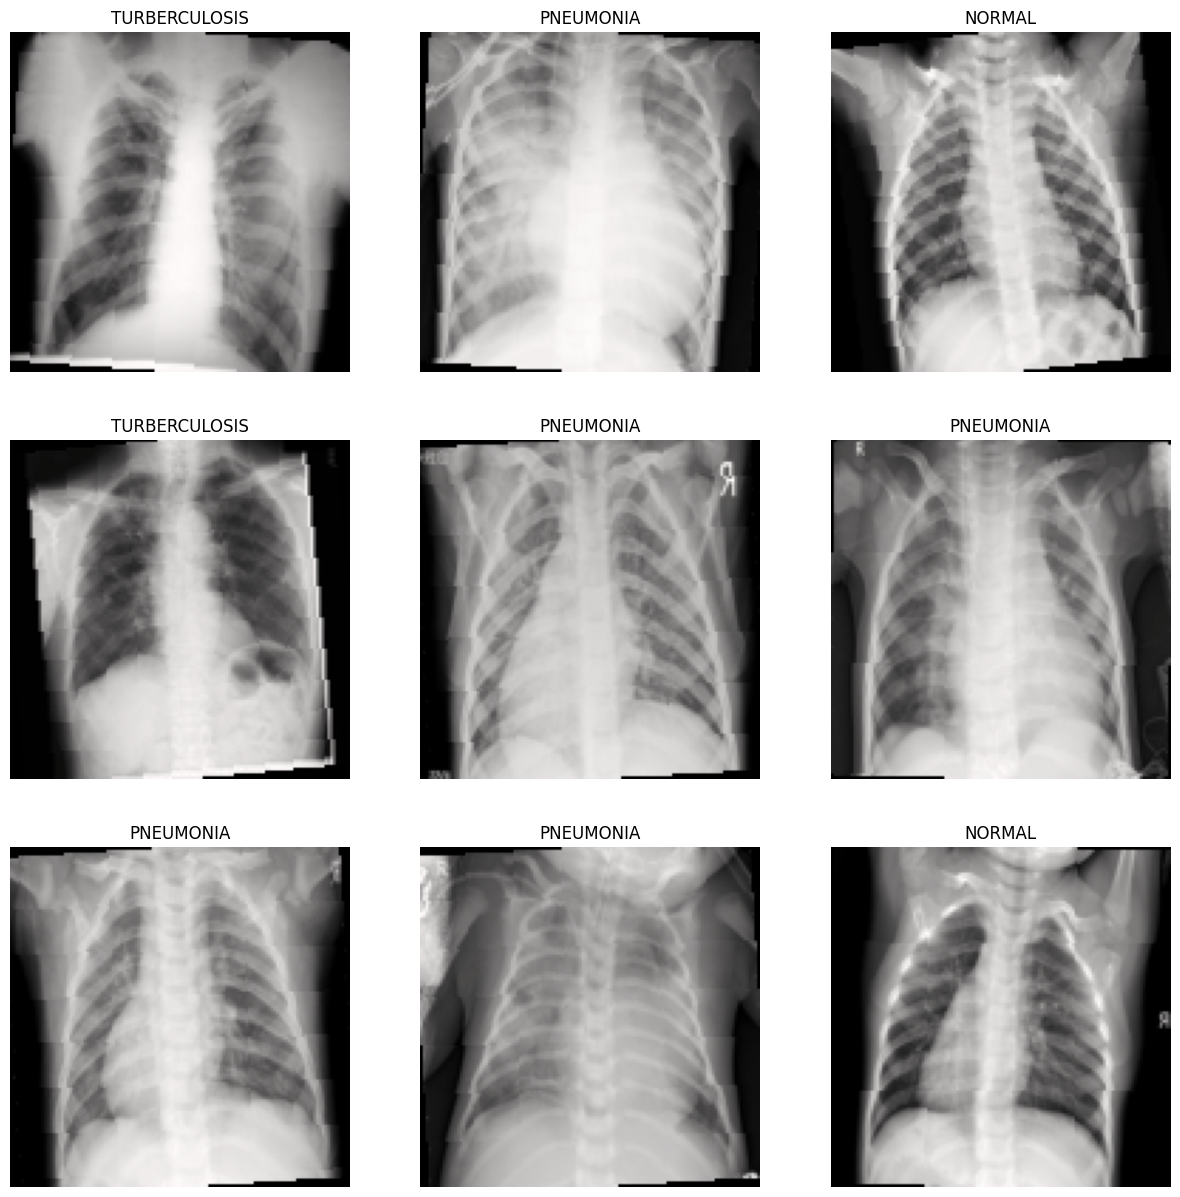

In [25]:
N_IMAGES = 10

images, labels = next(iter(train_iter))
image_label_pairs = list(zip(images, labels))
random.shuffle(image_label_pairs)
shuffled_images, shuffled_labels = zip(*image_label_pairs)
classes = train.classes

plot_images(shuffled_images[:N_IMAGES], shuffled_labels[:N_IMAGES], classes)


# Define Baseline Model
Using `resnet50()` as baseline model

In [26]:
class ResNet(nn.Module):
    def __init__(self, config, output_dim):
        super().__init__()

        block, n_blocks, channels = config
        self.in_channels = channels[0]

        assert len(n_blocks) == len(channels) == 4

        self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size = 7, stride = 2, padding = 3, bias = False)
        self.bn1 = nn.BatchNorm2d(self.in_channels)
        self.relu = nn.ReLU(inplace = True)
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)

        self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
        self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride = 2)
        self.layer3 = self.get_resnet_layer(block, n_blocks[2], channels[2], stride = 2)
        self.layer4 = self.get_resnet_layer(block, n_blocks[3], channels[3], stride = 2)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(self.in_channels, output_dim)

    def get_resnet_layer(self, block, n_blocks, channels, stride = 1):

        layers = []

        if self.in_channels != block.expansion * channels:
            downsample = True
        else:
            downsample = False

        layers.append(block(self.in_channels, channels, stride, downsample))

        for i in range(1, n_blocks):
            layers.append(block(block.expansion * channels, channels))

        self.in_channels = block.expansion * channels

        return nn.Sequential(*layers)

    def forward(self, x):

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.fc(h)

        return x, h

class BasicBlock(nn.Module):

    expansion = 1

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = 1, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])
resnet18_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [2,2,2,2],
                               channels = [64, 128, 256, 512])

resnet34_config = ResNetConfig(block = BasicBlock,
                               n_blocks = [3,4,6,3],
                               channels = [64, 128, 256, 512])

class Bottleneck(nn.Module):

    expansion = 4

    def __init__(self, in_channels, out_channels, stride = 1, downsample = False):
        super().__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn1 = nn.BatchNorm2d(out_channels)

        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size = 3,
                               stride = stride, padding = 1, bias = False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels, kernel_size = 1,
                               stride = 1, bias = False)
        self.bn3 = nn.BatchNorm2d(self.expansion * out_channels)

        self.relu = nn.ReLU(inplace = True)

        if downsample:
            conv = nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size = 1,
                             stride = stride, bias = False)
            bn = nn.BatchNorm2d(self.expansion * out_channels)
            downsample = nn.Sequential(conv, bn)
        else:
            downsample = None

        self.downsample = downsample

    def forward(self, x):

        i = x

        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)

        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None:
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

resnet50_config = ResNetConfig(block = Bottleneck,
                               n_blocks = [3, 4, 6, 3],
                               channels = [64, 128, 256, 512])

resnet101_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 4, 23, 3],
                                channels = [64, 128, 256, 512])

resnet152_config = ResNetConfig(block = Bottleneck,
                                n_blocks = [3, 8, 36, 3],
                                channels = [64, 128, 256, 512])

### HERE you can start to define your model, you can use different resnet for your work.

In [27]:
pretrained_model = models.resnet50(pretrained = True)
IN_FEATURES = pretrained_model.fc.in_features
OUTPUT_DIM = len(train.classes)

fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)
pretrained_model.fc = fc
resnet_model = ResNet(resnet50_config, OUTPUT_DIM)
resnet_model.load_state_dict(pretrained_model.state_dict())

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 136MB/s]


<All keys matched successfully>

In [28]:
def count_parameters(model):
    return __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(resnet_model):,} trainable parameters')

The model has 23,516,228 trainable parameters


### Setting the hyperparameters and train the model

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
resnet_model = resnet_model.to(device)
criterion = criterion.to(device)

In [30]:
FOUND_LR = 1e-3

params = [
          {'params': resnet_model.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model.bn1.parameters(), 'lr': FOUND_LR / 10},
          {'params': resnet_model.layer1.parameters(), 'lr': FOUND_LR / 8},
          {'params': resnet_model.layer2.parameters(), 'lr': FOUND_LR / 6},
          {'params': resnet_model.layer3.parameters(), 'lr': FOUND_LR / 4},
          {'params': resnet_model.layer4.parameters(), 'lr': FOUND_LR / 2},
          {'params': resnet_model.fc.parameters()}
         ]

# different optimizers
adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

#  First running the ResNet50 Model Using Adam optimizer

In [31]:
def changeepochs(epochs, opt):
    STEPS_PER_EPOCH = len(train_iter)
    TOTAL_STEPS = epochs * STEPS_PER_EPOCH

    MAX_LRS = [p['lr'] for p in opt.param_groups]

    scheduler = lr_scheduler.OneCycleLR(opt,
                                    max_lr = MAX_LRS,
                                    total_steps = TOTAL_STEPS)
    return scheduler

In [32]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [33]:
def train_model(model, iterator, optimizer, criterion, device, scheduler=None ):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred, _ = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()
        if scheduler:
            scheduler.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)

    return epoch_loss, epoch_acc

In [34]:
def evaluate(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0


    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)

    return epoch_loss, epoch_acc

In [35]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [36]:
scheduler = changeepochs(25, adam_opt)

In [37]:
def run_model(EPOCHS, model, opt, scheduler=None):
    counter = 0
    patience = 8
    best_valid_loss = float('inf')
    best_epoch = 0
    best_val_acc = float('inf')
    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []
    for epoch in range(EPOCHS):
        start_time = time.monotonic()
        if scheduler:
            train_loss, train_acc = train_model(model, train_iter, opt, criterion, device, scheduler)
            valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break
        else:
            train_loss, train_acc = train_model(model, train_iter, opt, criterion, device)
            valid_loss, valid_acc = evaluate(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break



        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:6.2f}% |")
        print(f"\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:6.2f}% |")
    print(f"best epcoh: {best_epoch+1}, best _validation accuracy: {best_val_acc}, best Validation loss: {best_valid_loss}")
    return train_accs, valid_accs, train_losses, valid_losses

In [38]:
train_accs, valid_accs, train_losses, valid_losses = run_model(25, resnet_model, adam_opt, scheduler)

Epoch: 01 | Epoch Time: 21m 17s
	Train Loss: 0.522 | Train Acc:  81.86% |
	Valid Loss: 0.239 | Valid Acc:  91.49% |
Epoch: 02 | Epoch Time: 1m 38s
	Train Loss: 0.187 | Train Acc:  93.32% |
	Valid Loss: 0.115 | Valid Acc:  96.35% |
Epoch: 03 | Epoch Time: 1m 33s
	Train Loss: 0.164 | Train Acc:  94.94% |
	Valid Loss: 0.219 | Valid Acc:  93.32% |
Epoch: 04 | Epoch Time: 1m 33s
	Train Loss: 0.152 | Train Acc:  95.11% |
	Valid Loss: 0.158 | Valid Acc:  94.62% |
Epoch: 05 | Epoch Time: 1m 33s
	Train Loss: 0.139 | Train Acc:  95.25% |
	Valid Loss: 0.140 | Valid Acc:  95.66% |
Epoch: 06 | Epoch Time: 1m 34s
	Train Loss: 0.111 | Train Acc:  96.18% |
	Valid Loss: 0.151 | Valid Acc:  95.40% |
Epoch: 07 | Epoch Time: 1m 33s
	Train Loss: 0.128 | Train Acc:  95.80% |
	Valid Loss: 0.131 | Valid Acc:  95.83% |
Epoch: 08 | Epoch Time: 1m 33s
	Train Loss: 0.109 | Train Acc:  96.47% |
	Valid Loss: 0.164 | Valid Acc:  94.88% |
Epoch: 09 | Epoch Time: 1m 33s
	Train Loss: 0.077 | Train Acc:  97.45% |
	Valid

In [39]:
def plot_loss_acc():
    fig, ax = plt.subplots(1,2, figsize=(12,5))
    ax[0].plot(train_losses, label='Training Loss')
    ax[0].plot(valid_losses, label='Validation Loss')
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Train vs Validation Loss", weight="bold")
    ax[0].legend()

    ax[1].plot(train_accs, label='Training Accuracy')
    ax[1].plot(valid_accs, label='Validation Accuracy')
    ax[0].set_ylabel("Accuracy")
    ax[0].set_xlabel("Epochs")
    ax[1].set_title("Train vs Validation Accuracy", weight="bold")
    ax[1].legend();
    plt.show()

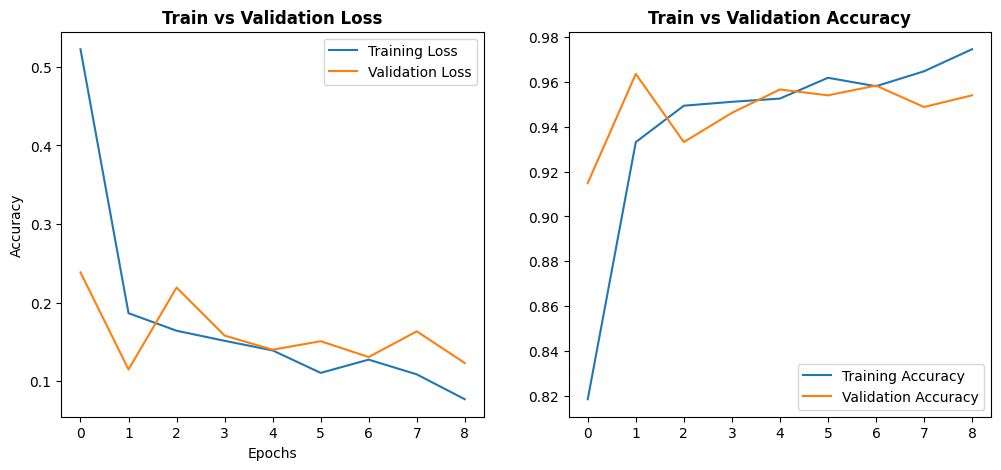

In [40]:
plot_loss_acc()

In [41]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

In [42]:
images, labels, probs = get_predictions(resnet_model, test_iter)
test = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/5Xray/ground_truth.csv")
y_test = np.array(test.drop(['id'], axis=1))

In [43]:
pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)
class_names = unique_labels(true_class, pred_class)
class_dict = {0: 'Covid19', 1: 'Normal', 2: 'Pneumonia', 3:'Tuberculosis'}
class_names = [class_dict[label] for label in class_names]

In [44]:
from scipy import interp
def plot_roc_curves(y_test, probs, class_labels):
    n_classes = len(class_labels)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.figure()
    lw = 2
    plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    for i, label in enumerate(class_labels):
        plt.plot(fpr[i], tpr[i], lw=lw,
                 label='ROC curve of {0} (area = {1:0.2f})'
                 ''.format(label, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curves of Proposed Method')
    plt.legend(loc="lower right")
    plt.show()


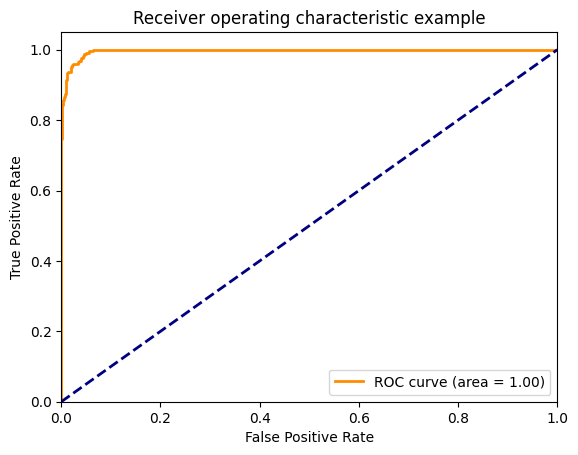

<ipython-input-44-64c49858e2a5>:35: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


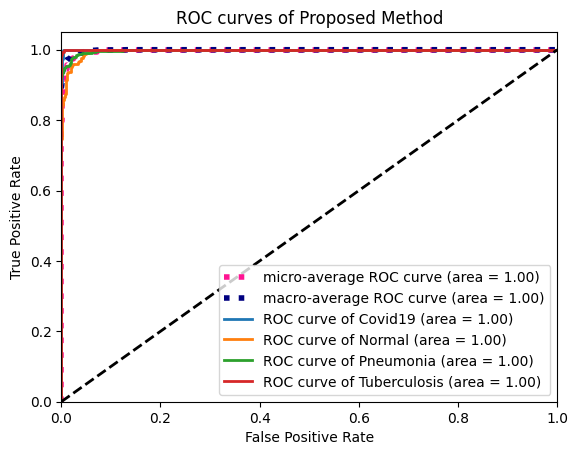

In [45]:
plot_roc_curves(y_test, probs, class_names)

In [46]:
def plot_cm_class_report():
    cm=confusion_matrix(true_class, pred_class)
    class_names = unique_labels(true_class, pred_class)
    class_dict = {0: 'Covid19', 1: 'Normal', 2: 'Pneumonia', 3:'Tuberculosis'}
    class_names = [class_dict[label] for label in class_names]
    print(cm)
    print(class_names)

    disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)

    C = cm
    divisor = np.zeros((4,4))
    divisor[0][:] = 1588
    divisor[1][:] = 1049
    divisor[2][:] = 1040
    divisor[3][:] = 1035
    cm_normalised=np.divide(cm, divisor)
    print(np.transpose(C.sum(axis=1)))
    print(divisor)
    cm_normalised = np.round(cm_normalised, 2)
    disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues, values_format='');
    print(classification_report(true_class, pred_class))

[[111   0   3   2]
 [  0 183  41   0]
 [  0   2 679   0]
 [  2   0   0 138]]
['Covid19', 'Normal', 'Pneumonia', 'Tuberculosis']
[116 224 681 140]
[[1588. 1588. 1588. 1588.]
 [1049. 1049. 1049. 1049.]
 [1040. 1040. 1040. 1040.]
 [1035. 1035. 1035. 1035.]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       116
           1       0.99      0.82      0.89       224
           2       0.94      1.00      0.97       681
           3       0.99      0.99      0.99       140

    accuracy                           0.96      1161
   macro avg       0.97      0.94      0.95      1161
weighted avg       0.96      0.96      0.96      1161



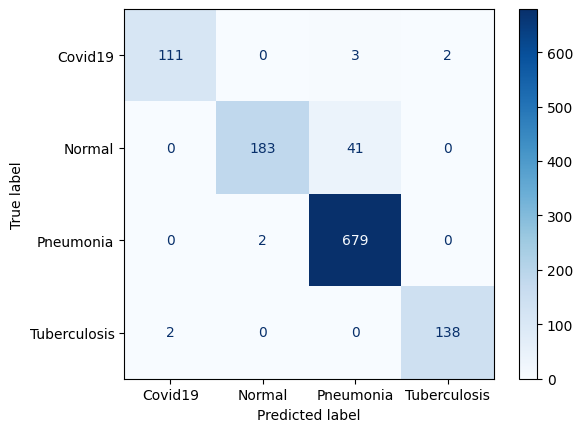

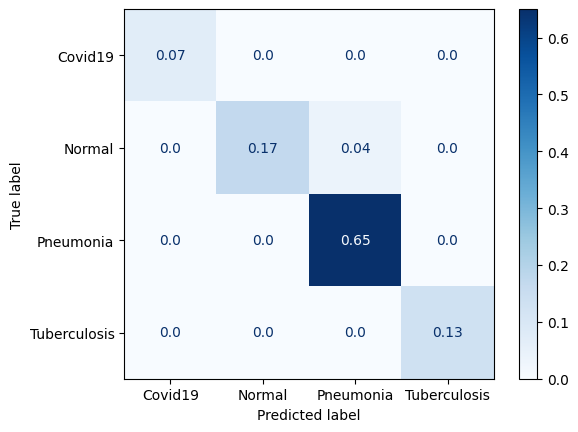

In [47]:
plot_cm_class_report()

In [48]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are arrays of true and predicted labels, respectively
cm = confusion_matrix(true_class, pred_class)

tp = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1]
tn = cm[1, 1]

# calculate precision, recall, and f1-score for class 0
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision, recall, f1_score))

Precision: 1.00, Recall: 1.00, F1-score: 1.00


In [49]:
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, recall_score


# Calculate micro-average F1, precision, and recall
micro_f1 = f1_score(true_class, pred_class, average='micro')
micro_precision = precision_score(true_class, pred_class, average='micro')
micro_recall = recall_score(true_class, pred_class, average='micro')

# Calculate macro-average F1, precision, and recall
macro_f1 = f1_score(true_class, pred_class, average='macro')
macro_precision = precision_score(true_class, pred_class, average='macro')
macro_recall = recall_score(true_class, pred_class, average='macro')

# Print the results
print("Micro F1-score: {:.2f}".format(micro_f1))
print("Micro Precision: {:.2f}".format(micro_precision))
print("Micro Recall: {:.2f}".format(micro_recall))

print("Macro F1-score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))


Micro F1-score: 0.96
Micro Precision: 0.96
Micro Recall: 0.96
Macro F1-score: 0.95
Macro Precision: 0.97
Macro Recall: 0.94


In [50]:
import numpy as np

def calculate_f1_score_per_class(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    f1_scores = np.zeros(num_classes)

    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_scores[i] = 2 * (precision * recall) / (precision + recall)

    return f1_scores

In [51]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Assume 'y_true' and 'y_pred' are your true labels and predictions
y_true = [0, 1, 2, 2, 3]  # example true classes
y_pred = [0, 1, 2, 3, 3]  # example predicted classes

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

def calculate_f1_score_per_class(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    f1_scores = np.zeros(num_classes)
    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP
        precision = TP / (TP + FP) if TP + FP != 0 else 0
        recall = TP / (TP + FN) if TP + FN != 0 else 0
        f1_scores[i] = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return f1_scores

# Calculate F1 scores
f1_scores = calculate_f1_score_per_class(cm)
print("F1 Scores per class:", f1_scores)


F1 Scores per class: [1.         1.         0.66666667 0.66666667]


# Define VGG Model

In [66]:
class VGG(nn.Module):
    def __init__(self, features, output_dim):
        super().__init__()

        self.features = features

        self.avgpool = nn.AdaptiveAvgPool2d(7)

        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(4096, output_dim),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        h = x.view(x.shape[0], -1)
        x = self.classifier(h)
        return x, h

vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
                512, 'M']

vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
                'M', 512, 512, 512, 'M']

vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
                512, 512, 'M', 512, 512, 512, 512, 'M']

def get_vgg_layers(config, batch_norm):

    layers = []
    in_channels = 3

    for c in config:
        assert c == 'M' or isinstance(c, int)
        if c == 'M':
            layers += [nn.MaxPool2d(kernel_size=2)]
        else:
            conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
            if batch_norm:
                layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
            else:
                layers += [conv2d, nn.ReLU(inplace=True)]
            in_channels = c

    return nn.Sequential(*layers)

In [67]:
vgg16_layers = get_vgg_layers(vgg16_config, batch_norm=True)
#print(vgg11_layers)

OUTPUT_DIM = 4

model = VGG(vgg16_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg16_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [68]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 134,285,380 trainable parameters


Setting the hyperparameters and train the model

In [69]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.features.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.classifier.parameters()}
         ]

optimizer = optim.Adam(params, lr=FOUND_LR)

In [70]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [71]:
# def train(model, iterator, optimizer, criterion, device):
#     epoch_loss = 0
#     epoch_acc = 0
#     epoch_f1 = 0

#     model.train()

#     for (x, y) in tqdm(iterator, desc="Training", leave=False):
#         x = x.to(device)
#         y = y.to(device)

#         optimizer.zero_grad()

#         y_pred, _ = model(x)

#         loss = criterion(y_pred, y)

#         acc = calculate_accuracy(y_pred, y)

#         loss.backward()

#         optimizer.step()

#         epoch_loss += loss.item()
#         epoch_acc += acc.item()

#         # Compute micro-averaged F1 score
#         y_pred_labels = torch.argmax(y_pred, dim=1)
#         f1 = f1_score(y.cpu().numpy(), y_pred_labels.cpu().numpy(), average='micro')
#         epoch_f1 += f1

#     return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1 / len(iterator)


In [72]:
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    epoch_preds = []
    epoch_labels = []

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):
        optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)

        y_pred, _ = model(x)  # Assuming the model returns a tuple of (predictions, _)

        loss = criterion(y_pred, y)  # Corrected indexing of y
        acc = calculate_accuracy(y_pred, y)  # Corrected indexing of y

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        preds = torch.argmax(y_pred, dim=1).cpu().tolist()
        labels = y.cpu().tolist()

        epoch_preds.extend(preds)
        epoch_labels.extend(labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_preds, epoch_labels


In [73]:
# import numpy as np

# def evaluate(model, iterator, criterion, device):
#     epoch_loss = 0
#     epoch_acc = 0

#     model.eval()

#     with torch.no_grad():
#         all_preds = []
#         all_labels = []

#         for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
#             x = x.to(device)
#             y = y.to(device)

#             y_pred, _ = model(x)  # Assuming the tuple contains predictions and additional outputs if any

#             y_pred_cpu = y_pred.cpu()  # Move y_pred to CPU
#             loss = criterion(torch.from_numpy(np.array(y_pred_cpu)), torch.from_numpy(np.array(y.cpu())))

#             acc = calculate_accuracy(y_pred, y)

#             epoch_loss += loss.item()
#             epoch_acc += acc.item()

#             all_preds.extend(torch.argmax(y_pred_cpu, dim=1).tolist())
#             all_labels.extend(y.tolist())

#     return epoch_loss / len(iterator), epoch_acc / len(iterator), all_preds, all_labels


In [74]:
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    epoch_preds = []
    epoch_labels = []

    model.eval()

    with torch.no_grad():
        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)  # Assuming the model returns a tuple of (predictions, _)

            loss = criterion(y_pred, y)  # Corrected indexing of y
            acc = calculate_accuracy(y_pred, y)  # Corrected indexing of y

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            preds = torch.argmax(y_pred, dim=1).cpu().tolist()
            labels = y.cpu().tolist()

            epoch_preds.extend(preds)
            epoch_labels.extend(labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_preds, epoch_labels


In [75]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [76]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [77]:
from tqdm.notebook import tqdm, trange
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
EPOCHS = 25

best_valid_loss = float('inf')
best_macro_f1 = 0.0
best_epoch = 0
early_stop_counter = 0
early_stop_patience = 10

train_losses = []
valid_losses = []
train_accs = []
valid_accs = []
train_macro_f1s = []
valid_macro_f1s = []

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc, train_micro_f1, train_macro_f1 = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc, valid_preds, valid_labels = evaluate(model, valid_iter, criterion, device)

    # Add loss, accuracy, and micro/macro-averaged F1 scores to lists for plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    train_macro_f1s.append(train_macro_f1)

    # Compute micro/macro-averaged F1 score for validation
    valid_micro_f1 = f1_score(valid_labels, valid_preds, average='micro')
    valid_macro_f1 = f1_score(valid_labels, valid_preds, average='macro')
    valid_macro_f1s.append(valid_macro_f1)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_macro_f1 = valid_macro_f1
        best_epoch = epoch + 1
        torch.save(model.state_dict(), 'best-model.pt')
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter == early_stop_patience:
        print("Early stopping triggered. Training stopped.")
        break

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Train Macro-F1: {train_macro_f1[0]:.4f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% | Valid Macro-F1: {valid_macro_f1:.4f}')

# Print best scores and best epoch
print(f'Best Valid Loss: {best_valid_loss:.3f}')
print(f'Best Macro-F1 Score: {best_macro_f1:.4f}')
print(f'Best Epoch: {best_epoch}')


Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 42s
	Train Loss: 2.775 | Train Acc: 68.37% | Train Macro-F1: 2.0000
	 Val. Loss: 0.679 |  Val. Acc: 73.44% | Valid Macro-F1: 0.6119


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 43s
	Train Loss: 0.435 | Train Acc: 85.27% | Train Macro-F1: 2.0000
	 Val. Loss: 0.346 |  Val. Acc: 87.85% | Valid Macro-F1: 0.8270


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 44s
	Train Loss: 0.354 | Train Acc: 86.95% | Train Macro-F1: 2.0000
	 Val. Loss: 0.306 |  Val. Acc: 89.76% | Valid Macro-F1: 0.8581


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 43s
	Train Loss: 0.338 | Train Acc: 88.57% | Train Macro-F1: 2.0000
	 Val. Loss: 0.316 |  Val. Acc: 88.37% | Valid Macro-F1: 0.8308


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 41s
	Train Loss: 0.297 | Train Acc: 89.61% | Train Macro-F1: 2.0000
	 Val. Loss: 0.322 |  Val. Acc: 89.06% | Valid Macro-F1: 0.8308


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 43s
	Train Loss: 0.313 | Train Acc: 89.15% | Train Macro-F1: 0.0000
	 Val. Loss: 0.234 |  Val. Acc: 91.84% | Valid Macro-F1: 0.8946


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 41s
	Train Loss: 0.252 | Train Acc: 91.81% | Train Macro-F1: 2.0000
	 Val. Loss: 0.238 |  Val. Acc: 92.71% | Valid Macro-F1: 0.8971


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 40s
	Train Loss: 0.253 | Train Acc: 91.55% | Train Macro-F1: 2.0000
	 Val. Loss: 0.302 |  Val. Acc: 89.93% | Valid Macro-F1: 0.8753


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 41s
	Train Loss: 0.278 | Train Acc: 91.06% | Train Macro-F1: 2.0000
	 Val. Loss: 0.190 |  Val. Acc: 93.32% | Valid Macro-F1: 0.9080


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 41s
	Train Loss: 0.197 | Train Acc: 93.49% | Train Macro-F1: 2.0000
	 Val. Loss: 0.205 |  Val. Acc: 93.14% | Valid Macro-F1: 0.9062


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 41s
	Train Loss: 0.224 | Train Acc: 92.82% | Train Macro-F1: 0.0000
	 Val. Loss: 0.248 |  Val. Acc: 93.14% | Valid Macro-F1: 0.9198


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 41s
	Train Loss: 0.160 | Train Acc: 94.70% | Train Macro-F1: 2.0000
	 Val. Loss: 0.181 |  Val. Acc: 93.49% | Valid Macro-F1: 0.9126


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 42s
	Train Loss: 0.167 | Train Acc: 94.76% | Train Macro-F1: 2.0000
	 Val. Loss: 0.187 |  Val. Acc: 93.32% | Valid Macro-F1: 0.9135


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 41s
	Train Loss: 0.159 | Train Acc: 94.79% | Train Macro-F1: 0.0000
	 Val. Loss: 0.189 |  Val. Acc: 93.84% | Valid Macro-F1: 0.9121


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 40s
	Train Loss: 0.168 | Train Acc: 94.94% | Train Macro-F1: 2.0000
	 Val. Loss: 0.282 |  Val. Acc: 91.84% | Valid Macro-F1: 0.9096


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 40s
	Train Loss: 0.141 | Train Acc: 95.54% | Train Macro-F1: 2.0000
	 Val. Loss: 0.252 |  Val. Acc: 94.79% | Valid Macro-F1: 0.9309


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 40s
	Train Loss: 0.162 | Train Acc: 95.23% | Train Macro-F1: 2.0000
	 Val. Loss: 0.216 |  Val. Acc: 94.36% | Valid Macro-F1: 0.9233


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 40s
	Train Loss: 0.165 | Train Acc: 94.65% | Train Macro-F1: 2.0000
	 Val. Loss: 0.186 |  Val. Acc: 93.40% | Valid Macro-F1: 0.9173


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 41s
	Train Loss: 0.148 | Train Acc: 95.17% | Train Macro-F1: 1.0000
	 Val. Loss: 0.203 |  Val. Acc: 94.88% | Valid Macro-F1: 0.9350


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 42s
	Train Loss: 0.122 | Train Acc: 96.06% | Train Macro-F1: 2.0000
	 Val. Loss: 0.162 |  Val. Acc: 95.57% | Valid Macro-F1: 0.9419


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 41s
	Train Loss: 0.127 | Train Acc: 95.83% | Train Macro-F1: 2.0000
	 Val. Loss: 0.209 |  Val. Acc: 93.14% | Valid Macro-F1: 0.9141


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 40s
	Train Loss: 0.244 | Train Acc: 92.88% | Train Macro-F1: 2.0000
	 Val. Loss: 0.248 |  Val. Acc: 93.23% | Valid Macro-F1: 0.9045


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 40s
	Train Loss: 0.228 | Train Acc: 92.71% | Train Macro-F1: 2.0000
	 Val. Loss: 0.175 |  Val. Acc: 94.36% | Valid Macro-F1: 0.9237


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 40s
	Train Loss: 0.171 | Train Acc: 94.65% | Train Macro-F1: 1.0000
	 Val. Loss: 0.198 |  Val. Acc: 93.75% | Valid Macro-F1: 0.9212


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 41s
	Train Loss: 0.147 | Train Acc: 95.11% | Train Macro-F1: 2.0000
	 Val. Loss: 0.173 |  Val. Acc: 94.18% | Valid Macro-F1: 0.9202
Best Valid Loss: 0.162
Best Macro-F1 Score: 0.9419
Best Epoch: 20


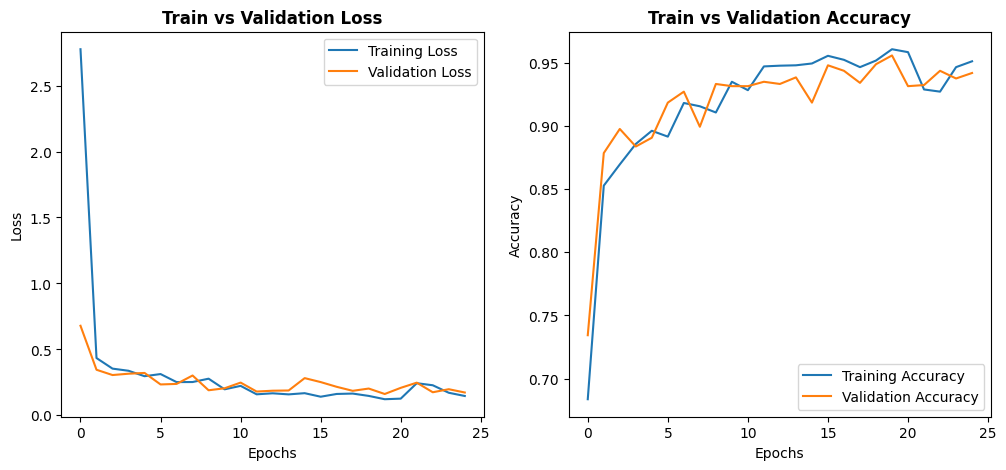

In [78]:
import matplotlib.pyplot as plt

def plot_loss_acc(train_losses, valid_losses, train_accs, valid_accs):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting training and validation losses
    ax[0].plot(train_losses, label='Training Loss')
    ax[0].plot(valid_losses, label='Validation Loss')
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Train vs Validation Loss", weight="bold")
    ax[0].legend()

    # Plotting training and validation accuracies
    ax[1].plot(train_accs, label='Training Accuracy')
    ax[1].plot(valid_accs, label='Validation Accuracy')
    ax[1].set_ylabel("Accuracy")  # Fixing the label to the correct axis
    ax[1].set_xlabel("Epochs")
    ax[1].set_title("Train vs Validation Accuracy", weight="bold")
    ax[1].legend()

    plt.show()


In [80]:
model.load_state_dict(torch.load('best-model.pt'))

<All keys matched successfully>

In [81]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/37 [00:00<?, ?it/s]

In [82]:
images, labels, probs = get_predictions(model, test_iter)
test = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/5Xray/ground_truth.csv")
y_test = np.array(test.drop(['id'], axis=1))

  0%|          | 0/37 [00:00<?, ?it/s]

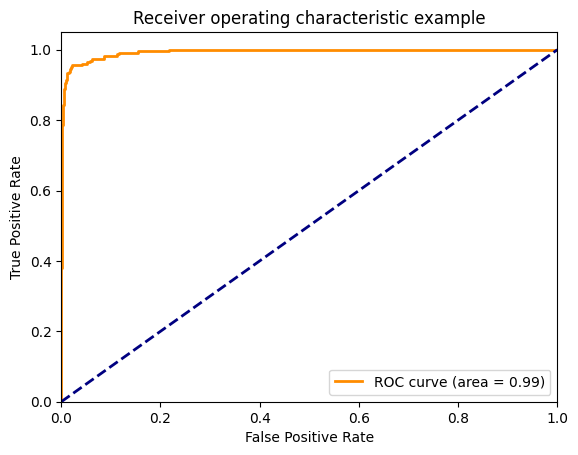

<ipython-input-83-ab45b983b72d>:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


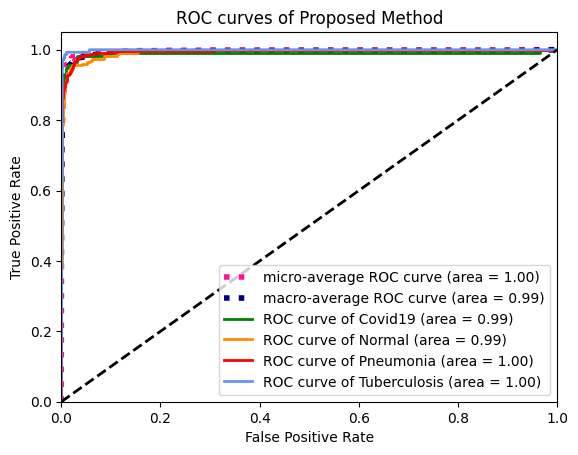

In [83]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=4

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of Covid19 (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw,
         label='ROC curve of Normal (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of Pneumonia (area = {1:0.2f})'
         ''.format(1, roc_auc[2]))

plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
         label='ROC curve of Tuberculosis (area = {1:0.2f})'
         ''.format(1, roc_auc[3]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

[[106   0   7   3]
 [  0 204  20   0]
 [  1   9 671   0]
 [  5   0   1 134]]
[0 1 2 3]
[116 224 681 140]
[[ 74.  74.  74.  74.]
 [201. 201. 201. 201.]
 [361. 361. 361. 361.]
 [ 59.  59.  59.  59.]]


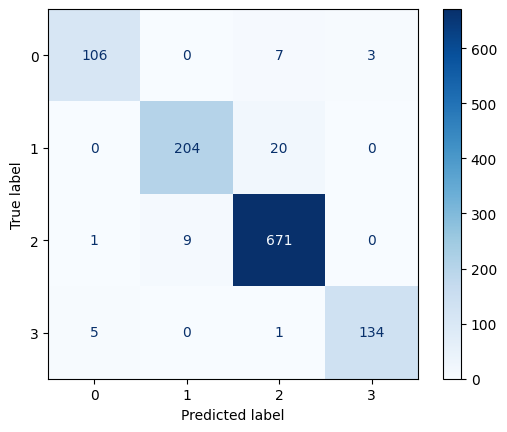

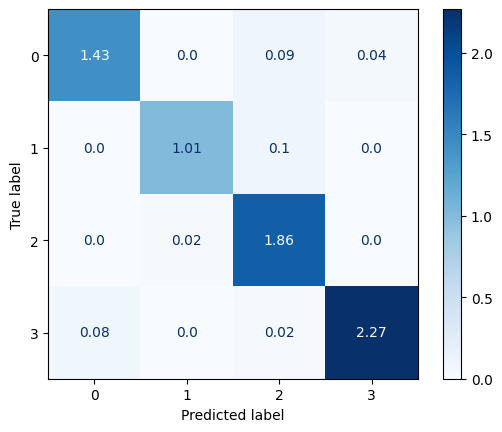

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

C = cm
divisor = np.zeros((4,4))
divisor[0][:] = 74
divisor[1][:] = 201
divisor[2][:] = 361
divisor[3][:] = 59

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

In [85]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are arrays of true and predicted labels, respectively
cm = confusion_matrix(true_class, pred_class)

tp = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1]
tn = cm[1, 1]

# calculate precision, recall, and f1-score for class 0
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision, recall, f1_score))

Precision: 1.00, Recall: 1.00, F1-score: 1.00


In [86]:
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, recall_score


# Calculate micro-average F1, precision, and recall
micro_f1 = f1_score(true_class, pred_class, average='micro')
micro_precision = precision_score(true_class, pred_class, average='micro')
micro_recall = recall_score(true_class, pred_class, average='micro')

# Calculate macro-average F1, precision, and recall
macro_f1 = f1_score(true_class, pred_class, average='macro')
macro_precision = precision_score(true_class, pred_class, average='macro')
macro_recall = recall_score(true_class, pred_class, average='macro')

# Print the results
print("Micro F1-score: {:.2f}".format(micro_f1))
print("Micro Precision: {:.2f}".format(micro_precision))
print("Micro Recall: {:.2f}".format(micro_recall))

print("Macro F1-score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))


Micro F1-score: 0.96
Micro Precision: 0.96
Micro Recall: 0.96
Macro F1-score: 0.95
Macro Precision: 0.96
Macro Recall: 0.94


In [87]:
import numpy as np

def calculate_f1_score_per_class(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    f1_scores = np.zeros(num_classes)

    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_scores[i] = 2 * (precision * recall) / (precision + recall)

    return f1_scores

In [88]:
f1_scores = calculate_f1_score_per_class(cm_normalised)
print(f1_scores)

[0.93159609 0.94392523 0.94177215 0.97008547]


In [89]:
# class VGG(nn.Module):
#     def __init__(self, features, output_dim):
#         super().__init__()

#         self.features = features

#         self.avgpool = nn.AdaptiveAvgPool2d(7)

#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.5),
#             nn.Linear(4096, 4096),
#             nn.ReLU(inplace=True),
#             nn.Dropout(0.5),
#             nn.Linear(4096, output_dim),
#         )

#     def forward(self, x):
#         x = self.features(x)
#         x = self.avgpool(x)
#         h = x.view(x.shape[0], -1)
#         x = self.classifier(h)
#         return x, h

# vgg11_config = [64, 'M', 128, 'M', 256, 256, 'M', 512, 512, 'M', 512, 512, 'M']

# vgg13_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 'M', 512, 512, 'M', 512,
#                 512, 'M']

# vgg16_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512,
#                 'M', 512, 512, 512, 'M']

# vgg19_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 256, 'M', 512, 512,
#                 512, 512, 'M', 512, 512, 512, 512, 'M']

# vgg34_config = [64, 64, 'M', 128, 128, 'M', 256, 256, 256, 'M', 512, 512, 512, 'M',
#                 512, 512, 512, 'M', 512, 512, 512, 'M']



# def get_vgg_layers(config, batch_norm):

#     layers = []
#     in_channels = 3

#     for c in config:
#         assert c == 'M' or isinstance(c, int)
#         if c == 'M':
#             layers += [nn.MaxPool2d(kernel_size=2)]
#         else:
#             conv2d = nn.Conv2d(in_channels, c, kernel_size=3, padding=1)
#             if batch_norm:
#                 layers += [conv2d, nn.BatchNorm2d(c), nn.ReLU(inplace=True)]
#             else:
#                 layers += [conv2d, nn.ReLU(inplace=True)]
#             in_channels = c

#     return nn.Sequential(*layers)

# vgg19_layers = get_vgg_layers(vgg19_config, batch_norm=True)
# #print(vgg19_layers)

In [90]:
vgg19_layers = get_vgg_layers(vgg19_config, batch_norm=True)
OUTPUT_DIM = 4

vgg_model2 = VGG(vgg19_layers, OUTPUT_DIM)
#print(model)
pretrained_model = models.vgg19_bn(pretrained=True)
#print(pretrained_model)
IN_FEATURES = pretrained_model.classifier[-1].in_features

final_fc = nn.Linear(IN_FEATURES, OUTPUT_DIM)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_BN_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_BN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 134,285,380 trainable parameters


Setting the hyperparameters and train the model

In [92]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
          {'params': model.features.parameters(), 'lr': FOUND_LR / 10},
          {'params': model.classifier.parameters()}
         ]

optimizer = optim.Adam(params, lr=FOUND_LR)

In [93]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [94]:
# def train(model, iterator, optimizer, criterion, device):
#     epoch_loss = 0
#     epoch_acc = 0
#     epoch_f1 = 0

#     model.train()

#     for (x, y) in tqdm(iterator, desc="Training", leave=False):
#         x = x.to(device)
#         y = y.to(device)

#         optimizer.zero_grad()

#         y_pred, _ = model(x)

#         loss = criterion(y_pred, y)

#         acc = calculate_accuracy(y_pred, y)

#         loss.backward()

#         optimizer.step()

#         epoch_loss += loss.item()
#         epoch_acc += acc.item()

#         # Compute micro-averaged F1 score
#         y_pred_labels = torch.argmax(y_pred, dim=1)
#         f1 = f1_score(y.cpu().numpy(), y_pred_labels.cpu().numpy(), average='micro')
#         epoch_f1 += f1

#     return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_f1 / len(iterator)


In [95]:
def train(model, iterator, optimizer, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    epoch_preds = []
    epoch_labels = []

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):
        optimizer.zero_grad()

        x = x.to(device)
        y = y.to(device)

        y_pred, _ = model(x)  # Assuming the model returns a tuple of (predictions, _)

        loss = criterion(y_pred, y)  # Corrected indexing of y
        acc = calculate_accuracy(y_pred, y)  # Corrected indexing of y

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

        preds = torch.argmax(y_pred, dim=1).cpu().tolist()
        labels = y.cpu().tolist()

        epoch_preds.extend(preds)
        epoch_labels.extend(labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_preds, epoch_labels


In [96]:
# import numpy as np

# def evaluate(model, iterator, criterion, device):
#     epoch_loss = 0
#     epoch_acc = 0

#     model.eval()

#     with torch.no_grad():
#         all_preds = []
#         all_labels = []

#         for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
#             x = x.to(device)
#             y = y.to(device)

#             y_pred, _ = model(x)  # Assuming the tuple contains predictions and additional outputs if any

#             y_pred_cpu = y_pred.cpu()  # Move y_pred to CPU
#             loss = criterion(torch.from_numpy(np.array(y_pred_cpu)), torch.from_numpy(np.array(y.cpu())))

#             acc = calculate_accuracy(y_pred, y)

#             epoch_loss += loss.item()
#             epoch_acc += acc.item()

#             all_preds.extend(torch.argmax(y_pred_cpu, dim=1).tolist())
#             all_labels.extend(y.tolist())

#     return epoch_loss / len(iterator), epoch_acc / len(iterator), all_preds, all_labels


In [97]:
def evaluate(model, iterator, criterion, device):
    epoch_loss = 0
    epoch_acc = 0
    epoch_preds = []
    epoch_labels = []

    model.eval()

    with torch.no_grad():
        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)  # Assuming the model returns a tuple of (predictions, _)

            loss = criterion(y_pred, y)  # Corrected indexing of y
            acc = calculate_accuracy(y_pred, y)  # Corrected indexing of y

            epoch_loss += loss.item()
            epoch_acc += acc.item()

            preds = torch.argmax(y_pred, dim=1).cpu().tolist()
            labels = y.cpu().tolist()

            epoch_preds.extend(preds)
            epoch_labels.extend(labels)

    return epoch_loss / len(iterator), epoch_acc / len(iterator), epoch_preds, epoch_labels


In [98]:
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [99]:
def get_predictions(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in tqdm(iterator):

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [100]:
from tqdm.notebook import tqdm, trange
EPOCHS = 25

best_valid_loss = float('inf')
best_macro_f1 = 0.0
best_epoch = 0
early_stop_counter = 0
early_stop_patience = 10

train_losses = []
valid_losses = []
train_accs = []
valid_accs = []
train_macro_f1s = []
valid_macro_f1s = []

for epoch in trange(EPOCHS, desc="Epochs"):

    start_time = time.monotonic()

    train_loss, train_acc, train_micro_f1, train_macro_f1 = train(model, train_iter, optimizer, criterion, device)
    valid_loss, valid_acc, valid_preds, valid_labels = evaluate(model, valid_iter, criterion, device)

    # Add loss, accuracy, and micro/macro-averaged F1 scores to lists for plotting
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
    train_macro_f1s.append(train_macro_f1)

    # Compute micro/macro-averaged F1 score for validation
    valid_micro_f1 = f1_score(valid_labels, valid_preds, average='micro')
    valid_macro_f1 = f1_score(valid_labels, valid_preds, average='macro')
    valid_macro_f1s.append(valid_macro_f1)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_macro_f1 = valid_macro_f1
        best_epoch = epoch + 1
        torch.save(model.state_dict(), 'best-model.pt')
        early_stop_counter = 0
    else:
        early_stop_counter += 1

    if early_stop_counter == early_stop_patience:
        print("Early stopping triggered. Training stopped.")
        break

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}% | Train Macro-F1: {train_macro_f1[0]:.4f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}% | Valid Macro-F1: {valid_macro_f1:.4f}')

# Print best scores and best epoch
print(f'Best Valid Loss: {best_valid_loss:.3f}')
print(f'Best Macro-F1 Score: {best_macro_f1:.4f}')
print(f'Best Epoch: {best_epoch}')


Epochs:   0%|          | 0/25 [00:00<?, ?it/s]

Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 1m 40s
	Train Loss: 0.244 | Train Acc: 92.48% | Train Macro-F1: 2.0000
	 Val. Loss: 0.296 |  Val. Acc: 92.53% | Valid Macro-F1: 0.9092


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 1m 43s
	Train Loss: 0.210 | Train Acc: 93.84% | Train Macro-F1: 2.0000
	 Val. Loss: 0.167 |  Val. Acc: 94.27% | Valid Macro-F1: 0.9300


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 1m 43s
	Train Loss: 0.214 | Train Acc: 93.20% | Train Macro-F1: 2.0000
	 Val. Loss: 0.270 |  Val. Acc: 91.58% | Valid Macro-F1: 0.8998


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 1m 43s
	Train Loss: 0.200 | Train Acc: 94.07% | Train Macro-F1: 2.0000
	 Val. Loss: 0.156 |  Val. Acc: 94.62% | Valid Macro-F1: 0.9274


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 1m 44s
	Train Loss: 0.150 | Train Acc: 95.02% | Train Macro-F1: 2.0000
	 Val. Loss: 0.205 |  Val. Acc: 93.66% | Valid Macro-F1: 0.9229


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 1m 40s
	Train Loss: 0.308 | Train Acc: 92.36% | Train Macro-F1: 1.0000
	 Val. Loss: 0.581 |  Val. Acc: 85.59% | Valid Macro-F1: 0.8090


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 1m 40s
	Train Loss: 0.295 | Train Acc: 90.68% | Train Macro-F1: 2.0000
	 Val. Loss: 0.162 |  Val. Acc: 94.36% | Valid Macro-F1: 0.9259


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 1m 40s
	Train Loss: 0.189 | Train Acc: 93.72% | Train Macro-F1: 2.0000
	 Val. Loss: 0.213 |  Val. Acc: 94.27% | Valid Macro-F1: 0.9210


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 1m 40s
	Train Loss: 0.155 | Train Acc: 95.05% | Train Macro-F1: 3.0000
	 Val. Loss: 0.161 |  Val. Acc: 95.40% | Valid Macro-F1: 0.9429


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 1m 39s
	Train Loss: 0.130 | Train Acc: 96.12% | Train Macro-F1: 1.0000
	 Val. Loss: 0.172 |  Val. Acc: 94.18% | Valid Macro-F1: 0.9297


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 11 | Epoch Time: 1m 40s
	Train Loss: 0.136 | Train Acc: 95.17% | Train Macro-F1: 2.0000
	 Val. Loss: 0.287 |  Val. Acc: 93.14% | Valid Macro-F1: 0.9233


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 12 | Epoch Time: 1m 41s
	Train Loss: 0.152 | Train Acc: 94.99% | Train Macro-F1: 2.0000
	 Val. Loss: 0.148 |  Val. Acc: 95.49% | Valid Macro-F1: 0.9405


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 13 | Epoch Time: 1m 41s
	Train Loss: 0.112 | Train Acc: 96.50% | Train Macro-F1: 2.0000
	 Val. Loss: 0.159 |  Val. Acc: 96.18% | Valid Macro-F1: 0.9545


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 14 | Epoch Time: 1m 42s
	Train Loss: 0.122 | Train Acc: 95.83% | Train Macro-F1: 3.0000
	 Val. Loss: 0.140 |  Val. Acc: 95.66% | Valid Macro-F1: 0.9427


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 15 | Epoch Time: 1m 41s
	Train Loss: 0.112 | Train Acc: 96.38% | Train Macro-F1: 0.0000
	 Val. Loss: 0.150 |  Val. Acc: 95.14% | Valid Macro-F1: 0.9373


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 16 | Epoch Time: 1m 40s
	Train Loss: 0.133 | Train Acc: 95.66% | Train Macro-F1: 2.0000
	 Val. Loss: 0.241 |  Val. Acc: 93.58% | Valid Macro-F1: 0.9172


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 17 | Epoch Time: 1m 40s
	Train Loss: 0.134 | Train Acc: 95.75% | Train Macro-F1: 2.0000
	 Val. Loss: 0.169 |  Val. Acc: 95.14% | Valid Macro-F1: 0.9407


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 18 | Epoch Time: 1m 40s
	Train Loss: 0.112 | Train Acc: 96.44% | Train Macro-F1: 2.0000
	 Val. Loss: 0.163 |  Val. Acc: 95.83% | Valid Macro-F1: 0.9502


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 19 | Epoch Time: 1m 40s
	Train Loss: 0.096 | Train Acc: 96.88% | Train Macro-F1: 2.0000
	 Val. Loss: 0.194 |  Val. Acc: 95.05% | Valid Macro-F1: 0.9376


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 20 | Epoch Time: 1m 40s
	Train Loss: 0.087 | Train Acc: 97.22% | Train Macro-F1: 0.0000
	 Val. Loss: 0.241 |  Val. Acc: 92.88% | Valid Macro-F1: 0.9157


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 21 | Epoch Time: 1m 39s
	Train Loss: 0.107 | Train Acc: 96.47% | Train Macro-F1: 3.0000
	 Val. Loss: 0.223 |  Val. Acc: 94.97% | Valid Macro-F1: 0.9382


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 22 | Epoch Time: 1m 40s
	Train Loss: 0.102 | Train Acc: 96.88% | Train Macro-F1: 3.0000
	 Val. Loss: 0.161 |  Val. Acc: 95.23% | Valid Macro-F1: 0.9485


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 23 | Epoch Time: 1m 40s
	Train Loss: 0.113 | Train Acc: 96.61% | Train Macro-F1: 1.0000
	 Val. Loss: 0.147 |  Val. Acc: 95.92% | Valid Macro-F1: 0.9534


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 24 | Epoch Time: 1m 40s
	Train Loss: 0.093 | Train Acc: 97.14% | Train Macro-F1: 2.0000
	 Val. Loss: 0.128 |  Val. Acc: 95.66% | Valid Macro-F1: 0.9488


Training:   0%|          | 0/108 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/36 [00:00<?, ?it/s]

Epoch: 25 | Epoch Time: 1m 41s
	Train Loss: 0.076 | Train Acc: 97.42% | Train Macro-F1: 1.0000
	 Val. Loss: 0.191 |  Val. Acc: 94.79% | Valid Macro-F1: 0.9321
Best Valid Loss: 0.128
Best Macro-F1 Score: 0.9488
Best Epoch: 24


In [108]:
import matplotlib.pyplot as plt

def plot_loss_acc(train_losses, valid_losses, train_accs, valid_accs):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting training and validation losses
    ax[0].plot(train_losses, label='Training Loss')
    ax[0].plot(valid_losses, label='Validation Loss')
    ax[0].set_ylabel("Loss")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Train vs Validation Loss", weight="bold")
    ax[0].legend()

    # Plotting training and validation accuracies
    ax[1].plot(train_accs, label='Training Accuracy')
    ax[1].plot(valid_accs, label='Validation Accuracy')
    ax[1].set_ylabel("Accuracy")  # Fixing the label to the correct axis
    ax[1].set_xlabel("Epochs")
    ax[1].set_title("Train vs Validation Accuracy", weight="bold")
    ax[1].legend()

    plt.show()


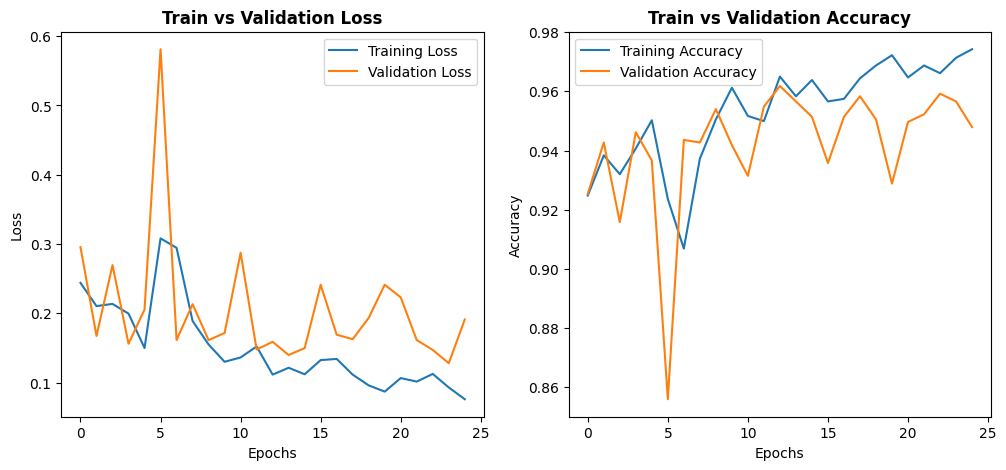

In [109]:
plot_loss_acc(train_losses, valid_losses, train_accs, valid_accs)


In [110]:
model.load_state_dict(torch.load('best-model.pt'))

<All keys matched successfully>

In [111]:
images, labels, probs = get_predictions(model, test_iter)

  0%|          | 0/37 [00:00<?, ?it/s]

In [112]:
# test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Blindness_detection/Blindsplit/ground_truth.csv')
# y_test = np.array(test.drop(['id'], axis=1))

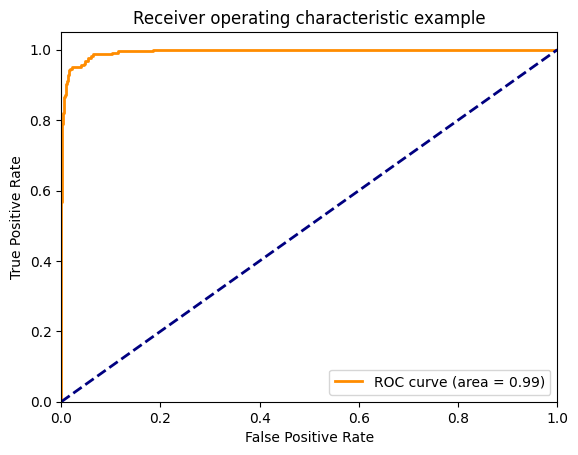

<ipython-input-113-ab45b983b72d>:45: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


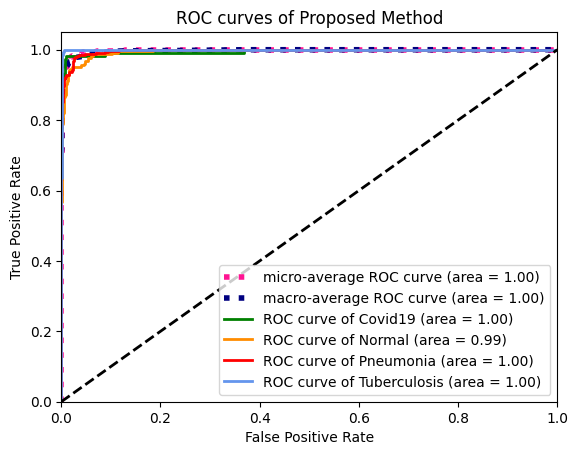

In [113]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#change to OneVsOneClassifier for generalized AUC
#from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

n_classes=4

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot(fpr[0], tpr[0], color='green', lw=lw,
         label='ROC curve of Covid19 (area = {1:0.2f})'
         ''.format(0, roc_auc[0]))

plt.plot(fpr[1], tpr[1], color='darkorange', lw=lw,
         label='ROC curve of Normal (area = {1:0.2f})'
         ''.format(1, roc_auc[1]))

# if you need more classes
plt.plot(fpr[2], tpr[2], color='red', lw=lw,
         label='ROC curve of Pneumonia (area = {1:0.2f})'
         ''.format(1, roc_auc[2]))

plt.plot(fpr[3], tpr[3], color='cornflowerblue', lw=lw,
         label='ROC curve of Tuberculosis (area = {1:0.2f})'
         ''.format(1, roc_auc[3]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves of Proposed Method')
plt.legend(loc="lower right")
plt.show()

[[108   2   5   1]
 [  1 196  27   0]
 [  1   7 673   0]
 [  5   0   0 135]]
[0 1 2 3]
[116 224 681 140]
[[ 74.  74.  74.  74.]
 [201. 201. 201. 201.]
 [361. 361. 361. 361.]
 [ 59.  59.  59.  59.]]


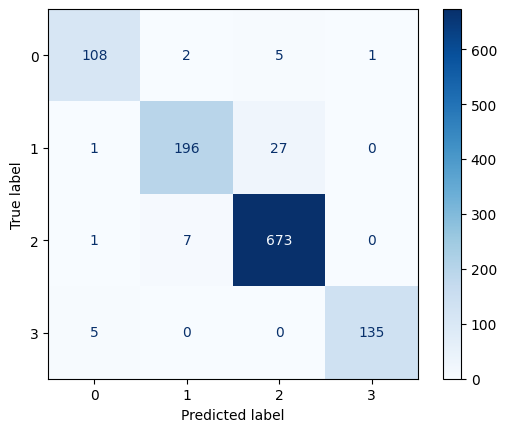

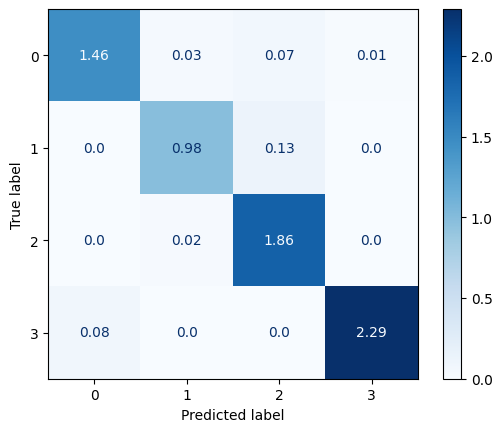

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from matplotlib.colors import Normalize
from sklearn.metrics import ConfusionMatrixDisplay

pred_class = np.argmax(probs,axis=1)
true_class = np.argmax(y_test, axis=1)

cm=confusion_matrix(true_class, pred_class)
class_names = unique_labels(true_class, pred_class)
print(cm)
print(class_names)

disp = ConfusionMatrixDisplay(cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)

C = cm
divisor = np.zeros((4,4))
divisor[0][:] = 74
divisor[1][:] = 201
divisor[2][:] = 361
divisor[3][:] = 59

cm_normalised=np.divide(cm, divisor)
print(np.transpose(C.sum(axis=1)))
print(divisor)
cm_normalised = np.round(cm_normalised, 2)
disp = ConfusionMatrixDisplay(cm_normalised, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format='')

In [115]:
from sklearn.metrics import confusion_matrix

# assume y_true and y_pred are arrays of true and predicted labels, respectively
cm = confusion_matrix(true_class, pred_class)

tp = cm[0, 0]
fp = cm[1, 0]
fn = cm[0, 1]
tn = cm[1, 1]

# calculate precision, recall, and f1-score for class 0
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Precision: {:.2f}, Recall: {:.2f}, F1-score: {:.2f}".format(precision, recall, f1_score))

Precision: 0.99, Recall: 0.98, F1-score: 0.99


In [116]:
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, recall_score


# Calculate micro-average F1, precision, and recall
micro_f1 = f1_score(true_class, pred_class, average='micro')
micro_precision = precision_score(true_class, pred_class, average='micro')
micro_recall = recall_score(true_class, pred_class, average='micro')

# Calculate macro-average F1, precision, and recall
macro_f1 = f1_score(true_class, pred_class, average='macro')
macro_precision = precision_score(true_class, pred_class, average='macro')
macro_recall = recall_score(true_class, pred_class, average='macro')

# Print the results
print("Micro F1-score: {:.2f}".format(micro_f1))
print("Micro Precision: {:.2f}".format(micro_precision))
print("Micro Recall: {:.2f}".format(micro_recall))

print("Macro F1-score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))


Micro F1-score: 0.96
Micro Precision: 0.96
Micro Recall: 0.96
Macro F1-score: 0.95
Macro Precision: 0.96
Macro Recall: 0.94


In [117]:
import numpy as np

def calculate_f1_score_per_class(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    f1_scores = np.zeros(num_classes)

    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_scores[i] = 2 * (precision * recall) / (precision + recall)

    return f1_scores

In [118]:
f1_scores = calculate_f1_score_per_class(cm_normalised)
print(f1_scores)

[0.93890675 0.91588785 0.94416244 0.98072805]


# Self Architecture

In [120]:
images, labels = next(iter(train_iter))

To calculate the output size
$$
\frac{W -F + 2P} S + 1
$$

where:

      W = width of input

      F = filter size

      P = padding  
      
      S = stride

### Starting the architecture with 1 convolution layer + Maxpooling and 2 fully connected layer

In [121]:
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5,padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)

torch.Size([32, 32, 118, 118])
torch.Size([32, 32, 59, 59])


In [122]:
class JadeNet(nn.Module):
    def __init__(self):
        super(JadeNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layers
        self.fc1 = nn.Linear(in_features=32*59*59, out_features=4096) # first fully connected layer
        self.out = nn.Linear(in_features=4096, out_features=4) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [123]:
jade= JadeNet()
jade

JadeNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=111392, out_features=4096, bias=True)
  (out): Linear(in_features=4096, out_features=4, bias=True)
)

In [124]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(jade):,} trainable parameters')

The model has 456,284,548 trainable parameters


### Setting the hyperparameters and train the model

In [125]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
jade = jade.to(device)
criterion = criterion.to(device)

In [126]:
FOUND_LR = 1e-3

params = [
          {'params': jade.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': jade.fc1.parameters(), 'lr': FOUND_LR / 5},
          {'params': jade.out.parameters()}
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)


In [127]:
scheduler = changeepochs(25, adam_opt)

NameError: name 'changeepochs' is not defined

In [ ]:
def train_self(model, iterator, optimizer, criterion, device, scheduler=None):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in iterator:

        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()

        y_pred = model(x)

        loss = criterion(y_pred, y)

        acc = calculate_accuracy(y_pred, y)

        loss.backward()

        optimizer.step()
        if scheduler:
            scheduler.step()

        epoch_loss += loss.item()
        epoch_acc += acc.item()

    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)

    return epoch_loss, epoch_acc

In [ ]:
def evaluate_self(model, iterator, criterion, device):

    epoch_loss = 0
    epoch_acc = 0


    model.eval()

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)
            y = y.to(device)

            y_pred = model(x)

            loss = criterion(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    epoch_loss /= len(iterator)
    epoch_acc /= len(iterator)

    return epoch_loss, epoch_acc

In [ ]:
def get_predictions_self(model, iterator):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred = model(x)

            y_prob = F.softmax(y_pred, dim = -1)
            top_pred = y_prob.argmax(1, keepdim = True)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim = 0)
    labels = torch.cat(labels, dim = 0)
    probs = torch.cat(probs, dim = 0)

    return images, labels, probs

In [ ]:
def run_self_model(EPOCHS, model, opt, scheduler=None):
    counter = 0
    patience = 8
    best_valid_loss = float('inf')
    best_epoch = 0
    best_val_acc = float('inf')
    train_accs = []
    valid_accs = []
    train_losses = []
    valid_losses = []
    for epoch in range(EPOCHS):
        start_time = time.monotonic()
        if scheduler:
            train_loss, train_acc = train_self(model, train_iter, opt, criterion, device, scheduler)
            valid_loss, valid_acc = evaluate_self(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break
        else:
            train_loss, train_acc = train_self(model, train_iter, opt, criterion, device)
            valid_loss, valid_acc = evaluate_self(model, valid_iter, criterion, device)

            if valid_loss < best_valid_loss:
                best_valid_loss = valid_loss
                best_val_acc = valid_acc
                best_epoch = epoch
                filename = f"{model.__class__.__name__}_{opt.__class__.__name__}.pt"
                torch.save(model.state_dict(), filename)
                counter = 0
            else:
                counter += 1  # increase patience counter on no improvement
                if counter >= patience:
                    print(f"Validation loss hasn't improved in {patience} epochs. Stopping early.")
                    break



        end_time = time.monotonic()

        epoch_mins, epoch_secs = epoch_time(start_time, end_time)

        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
        print(f"\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:6.2f}% |")
        print(f"\tValid Loss: {valid_loss:.3f} | Valid Acc: {valid_acc*100:6.2f}% |")
    print(f"best epcoh: {best_epoch+1}, best _validation accuracy: {best_val_acc}, best Validation loss: {best_valid_loss}")
    return train_accs, valid_accs, train_losses, valid_losses

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(25, jade, adam_opt, scheduler)

### Starting the architecture with 1 convolution layer + Maxpooling and 3 fully connected layer

In [ ]:
class jadeNet(nn.Module):
    def __init__(self):
        super(jadeNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # fully connected layers
        self.fc1 = nn.Linear(in_features=32*59*59, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=4) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
jade = jadeNet()
jade

In [ ]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(jade):,} trainable parameters')

### Setting the hyperparameters and train the model

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
jade = jade.to(device)
criterion = criterion.to(device)

In [128]:
FOUND_LR = 1e-3

params = [
          {'params': jade.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': jade.fc1.parameters(), 'lr': FOUND_LR / 8},
          {'params': jade.fc2.parameters(), 'lr': FOUND_LR / 6},
          {'params': jade.out.parameters()}
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)


AttributeError: 'JadeNet' object has no attribute 'fc2'

In [ ]:
scheduler = changeepochs(25, adam_opt)

In [ ]:
def train_self(model, iterator, optimizer, criterion, device, accumulation_steps=4):
    model.train()
    optimizer.zero_grad()
    for i, (x, y) in enumerate(iterator):
        x = x.to(device)
        y = y.to(device)
        y_pred = model(x)
        loss = criterion(y_pred, y)
        loss = loss / accumulation_steps  # Normalize the loss (optional but often beneficial)
        loss.backward()

        if (i + 1) % accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()
    if i % accumulation_steps != 0:  # Ensure the last set of gradients are applied
        optimizer.step()
        optimizer.zero_grad()


In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(25, jade, adam_opt, scheduler)

### Adding a second convolutional layers + pooling layer

In [ ]:
images, labels = next(iter(train_iter))
conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5,padding=1)
pool = nn.MaxPool2d(kernel_size=2, stride=2)
conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
x = conv1(images)
print(x.shape)
x = pool(x)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pool(x)
print(x.shape)

In [ ]:
class jadeNet(nn.Module):
    def __init__(self):
        super(jadeNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)

        # fully connected layers
        self.fc1 = nn.Linear(in_features=64*28*28, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=4) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [ ]:
jade = jadeNet()
jade

In [129]:
def count_parameters(model):
    return  __builtins__.sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(jade):,} trainable parameters')

The model has 456,284,548 trainable parameters


### Setting the hyperparameters and train the model

In [130]:
criterion = nn.CrossEntropyLoss()
jade = jade.to(device)
criterion = criterion.to(device)

In [131]:
FOUND_LR = 1e-3

params = [
          {'params': jade.conv1.parameters(), 'lr': FOUND_LR / 10},
          {'params': jade.conv2.parameters(), 'lr': FOUND_LR / 10},
          {'params': jade.fc1.parameters(), 'lr': FOUND_LR / 6},
          {'params': jade.fc2.parameters(), 'lr': FOUND_LR / 4},
          {'params': jade.out.parameters(), 'lr': FOUND_LR / 2},
          ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)


AttributeError: 'JadeNet' object has no attribute 'conv2'

In [ ]:
scheduler = changeepochs(25 adam_opt)

In [132]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(25, jade, adam_opt, scheduler)

NameError: name 'run_self_model' is not defined

Adding a second layer with Padding=1 improved the valid loss and accuracy

### Adding batchnormlization after the first convolution layer

In [133]:
class jadeNet(nn.Module):
    def __init__(self):
        super(jadeNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)

        # fully connected layers
        self.fc1 = nn.Linear(in_features=64*28*28, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [134]:
jade = jadeNet()
jade

jadeNet(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=3, bias=True)
)

In [135]:
print(f'The model has {count_parameters(jade):,} trainable parameters')

The model has 207,677,955 trainable parameters


In [136]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
jade = jade.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': jade.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': jade.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': jade.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': jade.fc1.parameters(), 'lr': FOUND_LR / 6},
        {'params': jade.fc2.parameters(), 'lr': FOUND_LR / 4},
        {'params': jade.out.parameters(), 'lr': FOUND_LR / 2},
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [137]:
scheduler =  changeepochs(25, adam_opt)

NameError: name 'changeepochs' is not defined

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(25, jade, adam_opt, scheduler)

### Adding batchnormlization affter 2nd convolutional layer

In [138]:
class jadeNet(nn.Module):
    def __init__(self):
        super(JadeNet,self).__init__()
        # first convolutional layer
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=5, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # second convolution layer
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        # fully connected layers
        self.fc1 = nn.Linear(in_features=64*28*28, out_features=4096) # first fully connected layer
        self.fc2 = nn.Linear(in_features=4096, out_features=512)# second fully connected layer
        self.out = nn.Linear(in_features=512, out_features=3) # last fully connected layer


    # Defining the forward pass
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn1(x))
        x = self.pool(F.relu(self.conv2(x))) #convolution layer + pooling + activation
        x = F.relu(self.bn2(x))
        x = x.view(x.shape[0], -1) # flatten
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [139]:
jade = jadeNet()
jade

TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
print(f'The model has {count_parameters(jade):,} trainable parameters')

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
criterion = nn.CrossEntropyLoss()
jade = jade.to(device)
criterion = criterion.to(device)

FOUND_LR = 1e-3

params = [
        {'params': jade.conv1.parameters(), 'lr': FOUND_LR / 10},
        {'params': jade.conv2.parameters(), 'lr': FOUND_LR / 10},
        {'params': jade.bn1.parameters(), 'lr': FOUND_LR / 8},
        {'params': jade.bn2.parameters(), 'lr': FOUND_LR / 6},
        {'params': jade.fc1.parameters(), 'lr': FOUND_LR / 4},
        {'params': jade.fc2.parameters(), 'lr': FOUND_LR / 2},
        {'params': jade.out.parameters()}
        ]

adam_opt = optim.Adam(params, lr=FOUND_LR)
sgd = optim.SGD(params, lr=FOUND_LR)
sgd_nesterov_opt = optim.SGD(params, lr=FOUND_LR,momentum=0.9, nesterov=True)

In [ ]:
scheduler =  changeepochs(25, adam_opt)

In [ ]:
train_accs, valid_accs, train_losses, valid_losses = run_self_model(25, jade, adam_opt, scheduler)

In [ ]:
plot_loss_acc()

In [140]:
# images, labels, probs = get_predictions_self(jade, test_iter)
# test = pd.read_csv(r"C:\Users\kings\OneDrive - MMU\MSC DATA SCIENCE\Deep learning\Assessment\myData\GroundTruth.csv")
# y_test = np.array(test.drop(['id'], axis=1))
# pred_class = np.argmax(probs,axis=1)
# true_class = np.argmax(y_test, axis=1)
# class_names = unique_labels(true_class, pred_class)
# class_dict = {0: 'Happy', 1: 'Neutral', 2: 'Sad'}
# class_names = [class_dict[label] for label in class_names]
# plot_roc_curves(y_test, probs, class_names)

In [141]:
plot_cm_class_report()

NameError: name 'plot_cm_class_report' is not defined

In [ ]:
import torch
import torch.nn as nn
from sklearn.metrics import f1_score, precision_score, recall_score


# Calculate micro-average F1, precision, and recall
micro_f1 = f1_score(true_class, pred_class, average='micro')
micro_precision = precision_score(true_class, pred_class, average='micro')
micro_recall = recall_score(true_class, pred_class, average='micro')

# Calculate macro-average F1, precision, and recall
macro_f1 = f1_score(true_class, pred_class, average='macro')
macro_precision = precision_score(true_class, pred_class, average='macro')
macro_recall = recall_score(true_class, pred_class, average='macro')

# Print the results
print("Micro F1-score: {:.2f}".format(micro_f1))
print("Micro Precision: {:.2f}".format(micro_precision))
print("Micro Recall: {:.2f}".format(micro_recall))

print("Macro F1-score: {:.2f}".format(macro_f1))
print("Macro Precision: {:.2f}".format(macro_precision))
print("Macro Recall: {:.2f}".format(macro_recall))


In [142]:
import numpy as np

def calculate_f1_score_per_class(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    f1_scores = np.zeros(num_classes)

    for i in range(num_classes):
        TP = confusion_matrix[i, i]
        FP = np.sum(confusion_matrix[:, i]) - TP
        FN = np.sum(confusion_matrix[i, :]) - TP

        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_scores[i] = 2 * (precision * recall) / (precision + recall)

    return f1_scores
f1_scores = calculate_f1_score_per_class(cm_normalised)
print(f1_scores)

[0.93890675 0.91588785 0.94416244 0.98072805]


In [143]:
def plot_filtered_images(images, filters, n_filters = None, normalize = True):

    images = torch.cat([i.unsqueeze(0) for i in images], dim = 0).cpu()
    filters = filters.cpu()

    if n_filters is not None:
        filters = filters[:n_filters]

    n_images = images.shape[0]
    n_filters = filters.shape[0]

    filtered_images = F.conv2d(images, filters)

    fig = plt.figure(figsize = (30, 30))

    for i in range(n_images):

        image = images[i]

        if normalize:
            image = normalize_image(image)

        ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters))
        ax.imshow(image.permute(1,2,0).numpy())
        ax.set_title('Original')
        ax.axis('off')

        for j in range(n_filters):
            image = filtered_images[i][j]

            if normalize:
                image = normalize_image(image)

            ax = fig.add_subplot(n_images, n_filters+1, i+1+(i*n_filters)+j+1)
            ax.imshow(image.numpy(), cmap = 'bone')
            ax.set_title(f'Filter {j+1}')
            ax.axis('off');

    fig.subplots_adjust(hspace = -0.6)